# Qiskit Pulse

In [2]:
import numpy as np
import jax
from scipy.optimize import minimize_scalar
from qiskit import QuantumCircuit, pulse, transpile, schedule
from qiskit.primitives import BackendSampler
from qiskit.pulse.library import Gaussian
from qiskit.pulse.library import Drag
from qiskit_dynamics import DynamicsBackend, Solver
from qiskit_dynamics.array import Array
from qiskit.providers.basic_provider import BasicProvider
from qiskit_ibm_runtime.fake_provider import FakeProvider, FakeValencia, FakeSherbrooke, FakeKolkata
from qiskit_ibm_provider import IBMProvider
from qiskit.circuit.library import XGate, SXGate, RZGate, CXGate
from qiskit.circuit import Gate, Parameter
import qiskit_ibm_provider.jupyter
from qiskit.visualization import plot_histogram
from qiskit.primitives import (
    Sampler, # V1
    StatevectorSampler, #V2
    Estimator, #V1
    StatevectorEstimator, #V2
)
#import warnings
#warnings.filterwarnings('ignore')

#backend1 = FakeProvider().get_backend("fake_ourense")
#backend = FakeValencia()
#backend

C:\Users\srinj\anaconda3\envs\Quantum\lib\site-packages\qiskit_dynamics\dispatch\backends\jax.py:34: UserWarning: The functionality in the perturbation module of Qiskit Dynamics requires a JAX version <= 0.4.6, due to a bug in JAX versions > 0.4.6. For versions 0.4.4, 0.4.5, and 0.4.6, using the perturbation module functionality requires setting os.environ['JAX_JIT_PJIT_API_MERGE'] = '0' before importing JAX or Dynamics.
  warnings.warn(


## Hadamard Gate Pulse

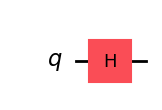

In [6]:
circ = QuantumCircuit(1)
circ.h(0)
circ.draw('mpl')

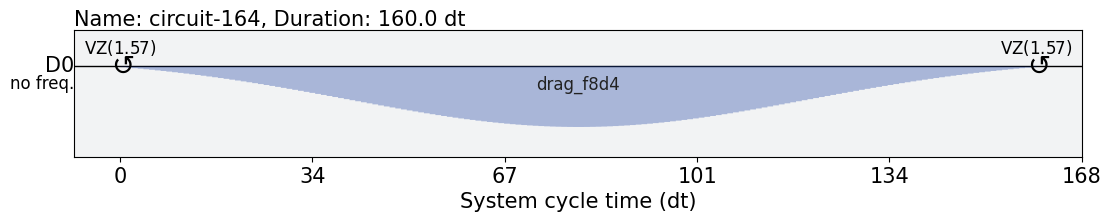

In [5]:
transpiled_circ = transpile(circ, backend)
schedule_circ = schedule(transpiled_circ, backend)
schedule_circ.draw()

In [6]:
schedule_circ.filter(channels=[pulse.DriveChannel(0)])

Schedule((0, ShiftPhase(-1.5707963268, DriveChannel(0))), (0, Play(Drag(duration=160, sigma=40, beta=-0.35835396095069005, amp=0.0961922281523014, angle=0.008783280252964184, name='drag_f8d4'), DriveChannel(0), name='drag_f8d4')), (160, ShiftPhase(-1.5707963268, DriveChannel(0))), name="circuit-164")

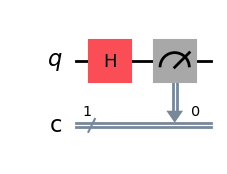

In [16]:
circ = QuantumCircuit(1, 1)
circ.h(0)
circ.measure(0, 0)
circ.draw('mpl')

DataBin<>(c=BitArray(<shape=(), num_shots=2048, num_bits=1>))
The counts are: {'0': 1043, '1': 1005}


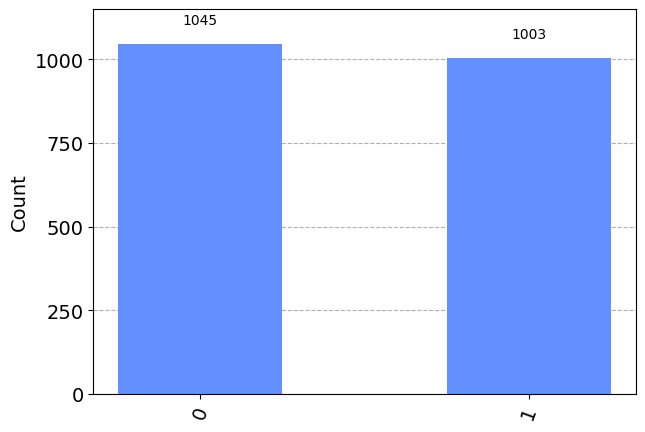

In [38]:
# Execute the quantum circuit using State Vector Sampler V2

sampler_v2 = StatevectorSampler()
# Run using V2 sampler
result = sampler_v2.run([circ], shots=2048).result()
# Access result data for pub 0
data_pub = result[0].data
print(data_pub)
# Access bitstring for the classical register "meas"
#bitstring = data_pub.c.get_bitstring()
#print(f"The bitstring shape is: {bitstring.shape}")
# Get counts for the classical register "c"
noiseless_counts = data_pub.c.get_counts()
print(f"The counts are: {noiseless_counts}")

plot_histogram(noiseless_counts)

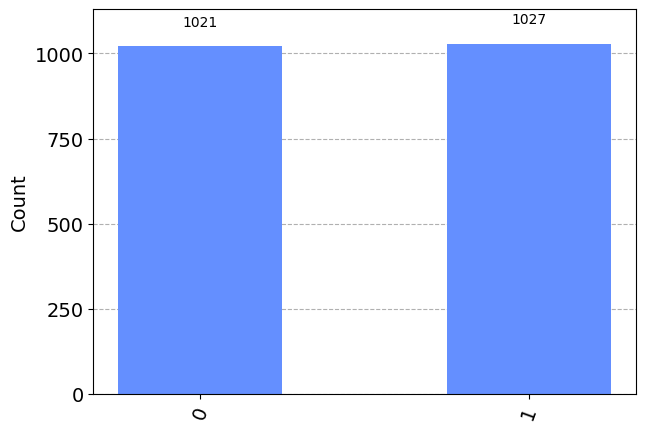

In [37]:
# Executing on Fake Quantum Hardware Provider

backend2 = FakeSherbrooke()
transpiled_circ = transpile(circ, backend2)
# Run the transpiled circuit using the simulated fake backend
job_fake = backend2.run(transpiled_circ, shots=2048)
noisy_counts = job_fake.result().get_counts()
plot_histogram(noisy_counts)

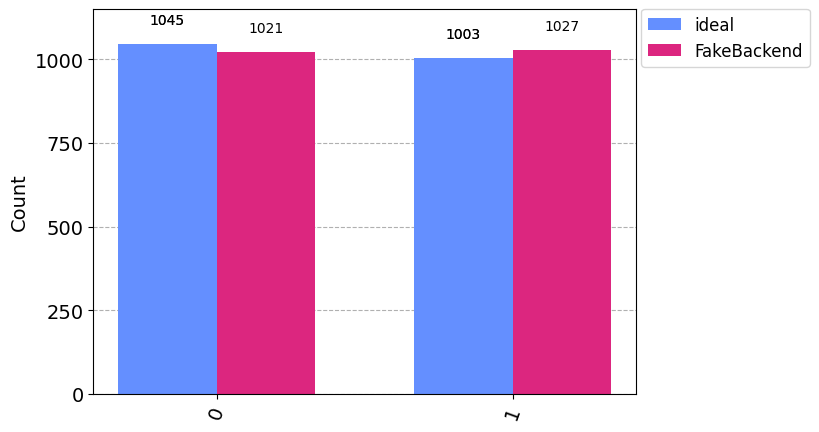

In [39]:
plot_histogram([noiseless_counts, noisy_counts], legend=['ideal','FakeBackend'])

## Pauli X Gate Pulse

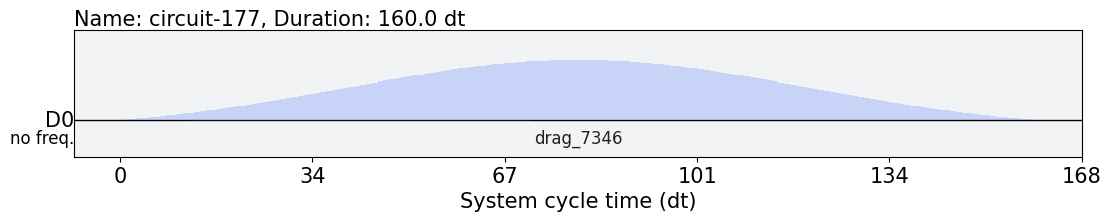

In [9]:
circ = QuantumCircuit(1)
circ.x(0)
transpiled_circ = transpile(circ, backend)
schedule_circ = schedule(transpiled_circ, backend)
schedule_circ.draw()

In [10]:
schedule_circ.filter(channels=[pulse.DriveChannel(0)])

Schedule((0, Play(Drag(duration=160, sigma=40, beta=-0.25388969010654494, amp=0.19290084722113582, angle=0.0, name='drag_7346'), DriveChannel(0), name='drag_7346')), name="circuit-177")

## Pauli Y Gate Pulse

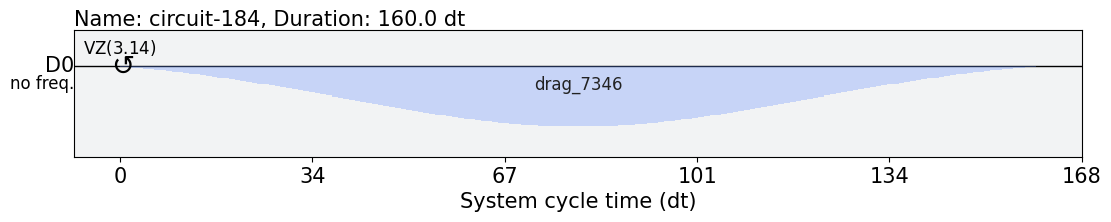

In [13]:
circ = QuantumCircuit(1)
circ.y(0)
transpiled_circ = transpile(circ, backend)
schedule_circ = schedule(transpiled_circ, backend)
schedule_circ.draw()

In [14]:
schedule_circ.filter(channels=[pulse.DriveChannel(0)])

Schedule((0, ShiftPhase(-3.1415926536, DriveChannel(0))), (0, Play(Drag(duration=160, sigma=40, beta=-0.25388969010654494, amp=0.19290084722113582, angle=0.0, name='drag_7346'), DriveChannel(0), name='drag_7346')), name="circuit-184")

## Pauli Z Gate Pulse

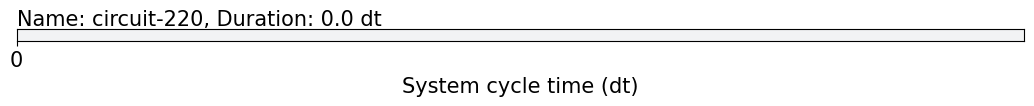

In [30]:
circ = QuantumCircuit(1)
circ.z(0)
transpiled_circ = transpile(circ, backend)
schedule_circ = schedule(transpiled_circ, backend)
schedule_circ.draw()

In [31]:
schedule_circ.filter(channels=[pulse.DriveChannel(0)])

Schedule((0, ShiftPhase(-3.1415926536, DriveChannel(0))), name="circuit-220")

## Rx Gate

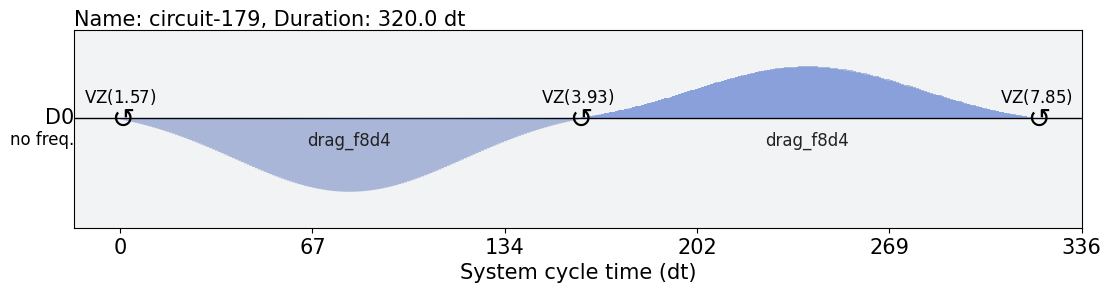

In [11]:
circ = QuantumCircuit(1)
circ.rx(np.pi/4, 0)
transpiled_circ = transpile(circ, backend)
schedule_circ = schedule(transpiled_circ, backend)
schedule_circ.draw()

In [12]:
schedule_circ.filter(channels=[pulse.DriveChannel(0)])

Schedule((0, ShiftPhase(-1.5707963268, DriveChannel(0))), (0, Play(Drag(duration=160, sigma=40, beta=-0.35835396095069005, amp=0.0961922281523014, angle=0.008783280252964184, name='drag_f8d4'), DriveChannel(0), name='drag_f8d4')), (160, ShiftPhase(-3.926990817, DriveChannel(0))), (160, Play(Drag(duration=160, sigma=40, beta=-0.35835396095069005, amp=0.0961922281523014, angle=0.008783280252964184, name='drag_f8d4'), DriveChannel(0), name='drag_f8d4')), (320, ShiftPhase(-7.853981634, DriveChannel(0))), name="circuit-179")

## CNOT Gate Pulse

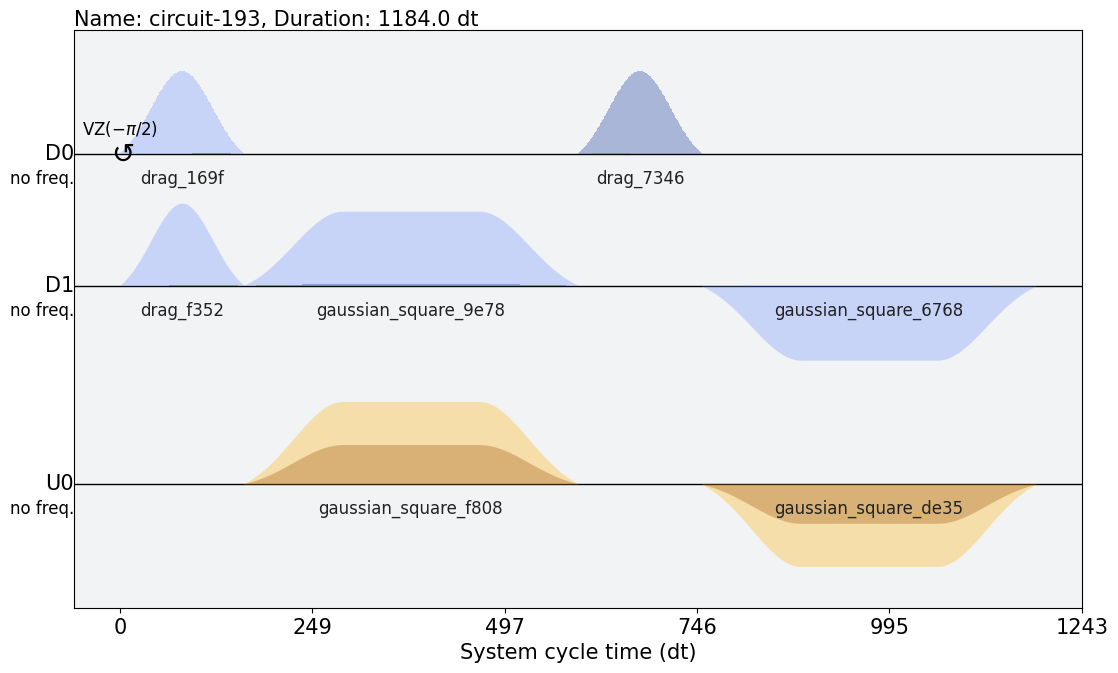

In [17]:
circ = QuantumCircuit(2)
circ.cx(0,1)
transpiled_circ = transpile(circ, backend)
schedule_circ = schedule(transpiled_circ, backend)
schedule_circ.draw()

In [20]:
schedule_circ.filter(channels=[pulse.DriveChannel(0),pulse.DriveChannel(1)])
#schedule_circ

Schedule((0, ShiftPhase(1.5707963267948966, DriveChannel(0))), (0, Play(Drag(duration=160, sigma=40, beta=-0.25388969010654494, amp=0.19290084722113582, angle=-1.5707963267948968, name='drag_169f'), DriveChannel(0), name='drag_169f')), (0, Play(Drag(duration=160, sigma=40, beta=-0.5196057292826135, amp=0.07464144638958038, angle=0.007898523847627245, name='drag_f352'), DriveChannel(1), name='drag_f352')), (160, Play(GaussianSquare(duration=432, sigma=64, width=176, amp=0.06740617502322208, angle=0.023765720478682046, name='gaussian_square_9e78'), DriveChannel(1), name='gaussian_square_9e78')), (592, Play(Drag(duration=160, sigma=40, beta=-0.25388969010654494, amp=0.19290084722113582, angle=0.0, name='drag_7346'), DriveChannel(0), name='drag_7346')), (752, Play(GaussianSquare(duration=432, sigma=64, width=176, amp=0.06740617502322208, angle=-3.1178269331111115, name='gaussian_square_6768'), DriveChannel(1), name='gaussian_square_6768')), name="circuit-193")

## CZ Gate Pulse

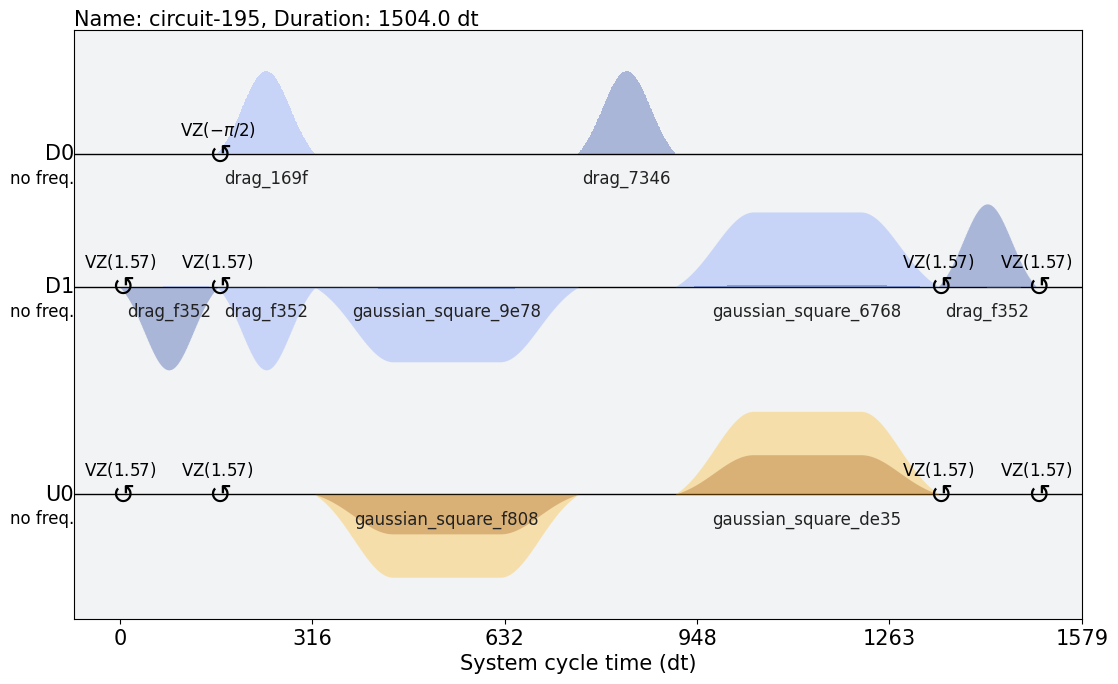

In [21]:
circ = QuantumCircuit(2)
circ.cz(0,1)
transpiled_circ = transpile(circ, backend)
schedule_circ = schedule(transpiled_circ, backend)
schedule_circ.draw()

In [22]:
schedule_circ.filter(channels=[pulse.DriveChannel(0),pulse.DriveChannel(1)])

Schedule((0, ShiftPhase(-1.5707963268, DriveChannel(1))), (0, Play(Drag(duration=160, sigma=40, beta=-0.5196057292826135, amp=0.07464144638958038, angle=0.007898523847627245, name='drag_f352'), DriveChannel(1), name='drag_f352')), (160, ShiftPhase(1.5707963267948966, DriveChannel(0))), (160, ShiftPhase(-1.5707963268, DriveChannel(1))), (160, Play(Drag(duration=160, sigma=40, beta=-0.25388969010654494, amp=0.19290084722113582, angle=-1.5707963267948968, name='drag_169f'), DriveChannel(0), name='drag_169f')), (160, Play(Drag(duration=160, sigma=40, beta=-0.5196057292826135, amp=0.07464144638958038, angle=0.007898523847627245, name='drag_f352'), DriveChannel(1), name='drag_f352')), (320, Play(GaussianSquare(duration=432, sigma=64, width=176, amp=0.06740617502322208, angle=0.023765720478682046, name='gaussian_square_9e78'), DriveChannel(1), name='gaussian_square_9e78')), (752, Play(Drag(duration=160, sigma=40, beta=-0.25388969010654494, amp=0.19290084722113582, angle=0.0, name='drag_7346')

## SWAP Gate Pulse

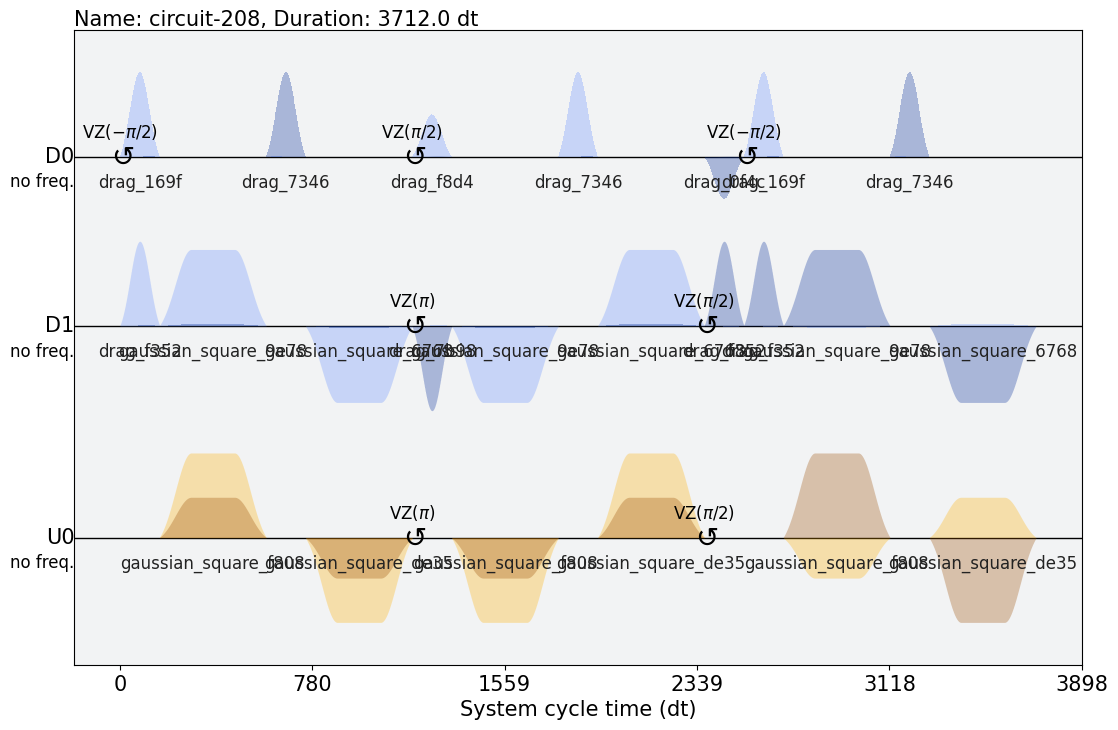

In [23]:
circ = QuantumCircuit(2)
circ.swap(0,1)
transpiled_circ = transpile(circ, backend)
schedule_circ = schedule(transpiled_circ, backend)
schedule_circ.draw()

In [24]:
schedule_circ.filter(channels=[pulse.DriveChannel(0),pulse.DriveChannel(1)])

Schedule((0, ShiftPhase(1.5707963267948966, DriveChannel(0))), (0, Play(Drag(duration=160, sigma=40, beta=-0.25388969010654494, amp=0.19290084722113582, angle=-1.5707963267948968, name='drag_169f'), DriveChannel(0), name='drag_169f')), (0, Play(Drag(duration=160, sigma=40, beta=-0.5196057292826135, amp=0.07464144638958038, angle=0.007898523847627245, name='drag_f352'), DriveChannel(1), name='drag_f352')), (160, Play(GaussianSquare(duration=432, sigma=64, width=176, amp=0.06740617502322208, angle=0.023765720478682046, name='gaussian_square_9e78'), DriveChannel(1), name='gaussian_square_9e78')), (592, Play(Drag(duration=160, sigma=40, beta=-0.25388969010654494, amp=0.19290084722113582, angle=0.0, name='drag_7346'), DriveChannel(0), name='drag_7346')), (752, Play(GaussianSquare(duration=432, sigma=64, width=176, amp=0.06740617502322208, angle=-3.1178269331111115, name='gaussian_square_6768'), DriveChannel(1), name='gaussian_square_6768')), (1184, ShiftPhase(-1.5707963267948966, DriveChann

## Measurement Gate

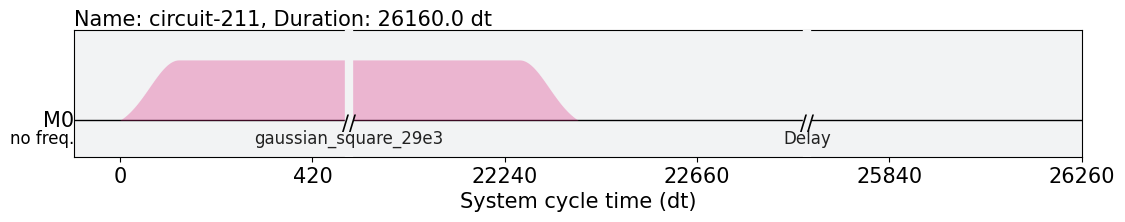

In [25]:
circ = QuantumCircuit(1)
circ.measure_all()
transpiled_circ = transpile(circ, backend)
schedule_circ = schedule(transpiled_circ, backend)
schedule_circ.draw()

In [27]:
schedule_circ

Schedule((0, Play(GaussianSquare(duration=22400, sigma=64, width=22144, amp=0.075, angle=0.0, name='gaussian_square_29e3'), MeasureChannel(0), name='gaussian_square_29e3')), (0, Acquire(26160, AcquireChannel(0), MemorySlot(0))), (22400, Delay(3760, MeasureChannel(0))), name="circuit-211")

## Bell State Pulse

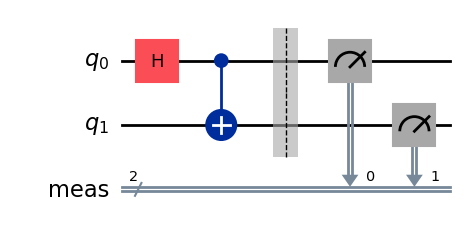

In [28]:
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0,1)
circ.measure_all()
circ.draw('mpl')

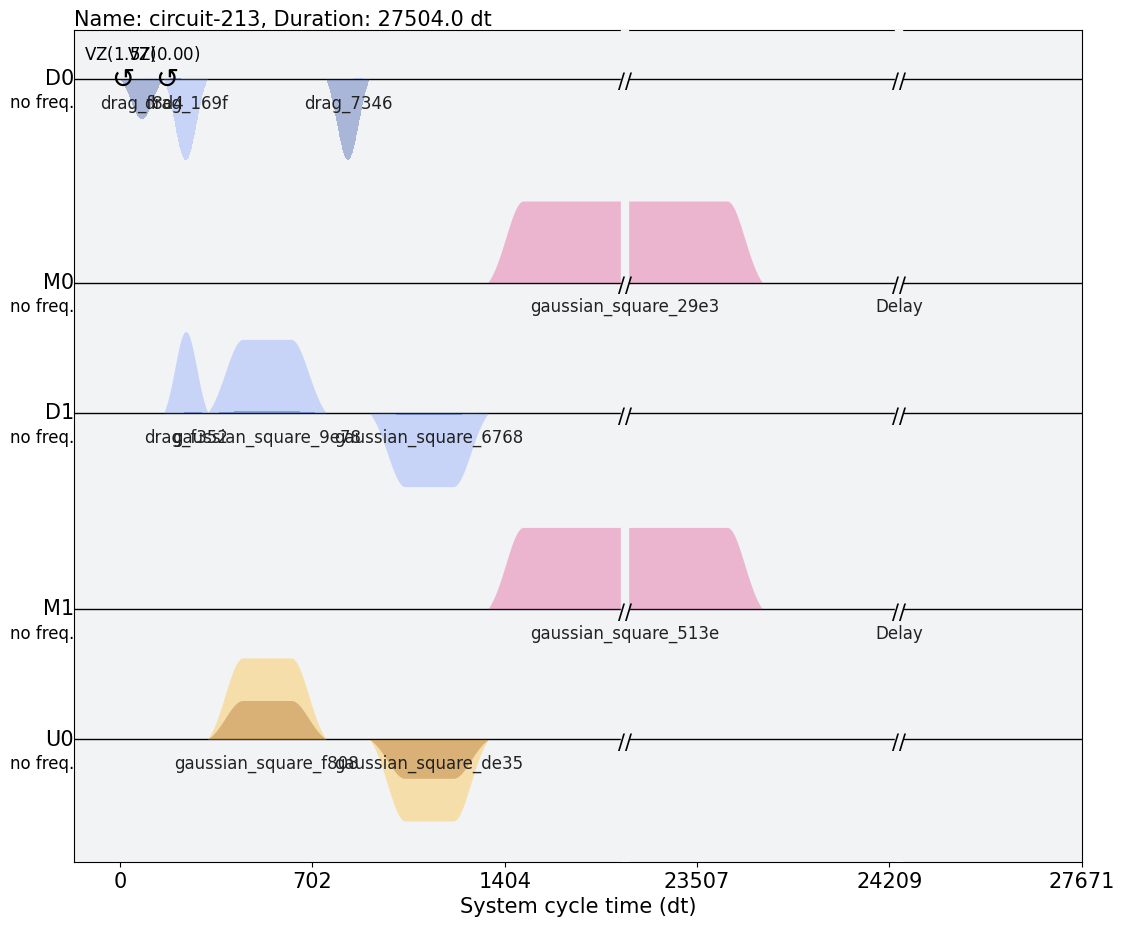

In [29]:
transpiled_circ = transpile(circ, backend)
schedule_circ = schedule(transpiled_circ, backend)
schedule_circ.draw()

## Dynamic Decoupling

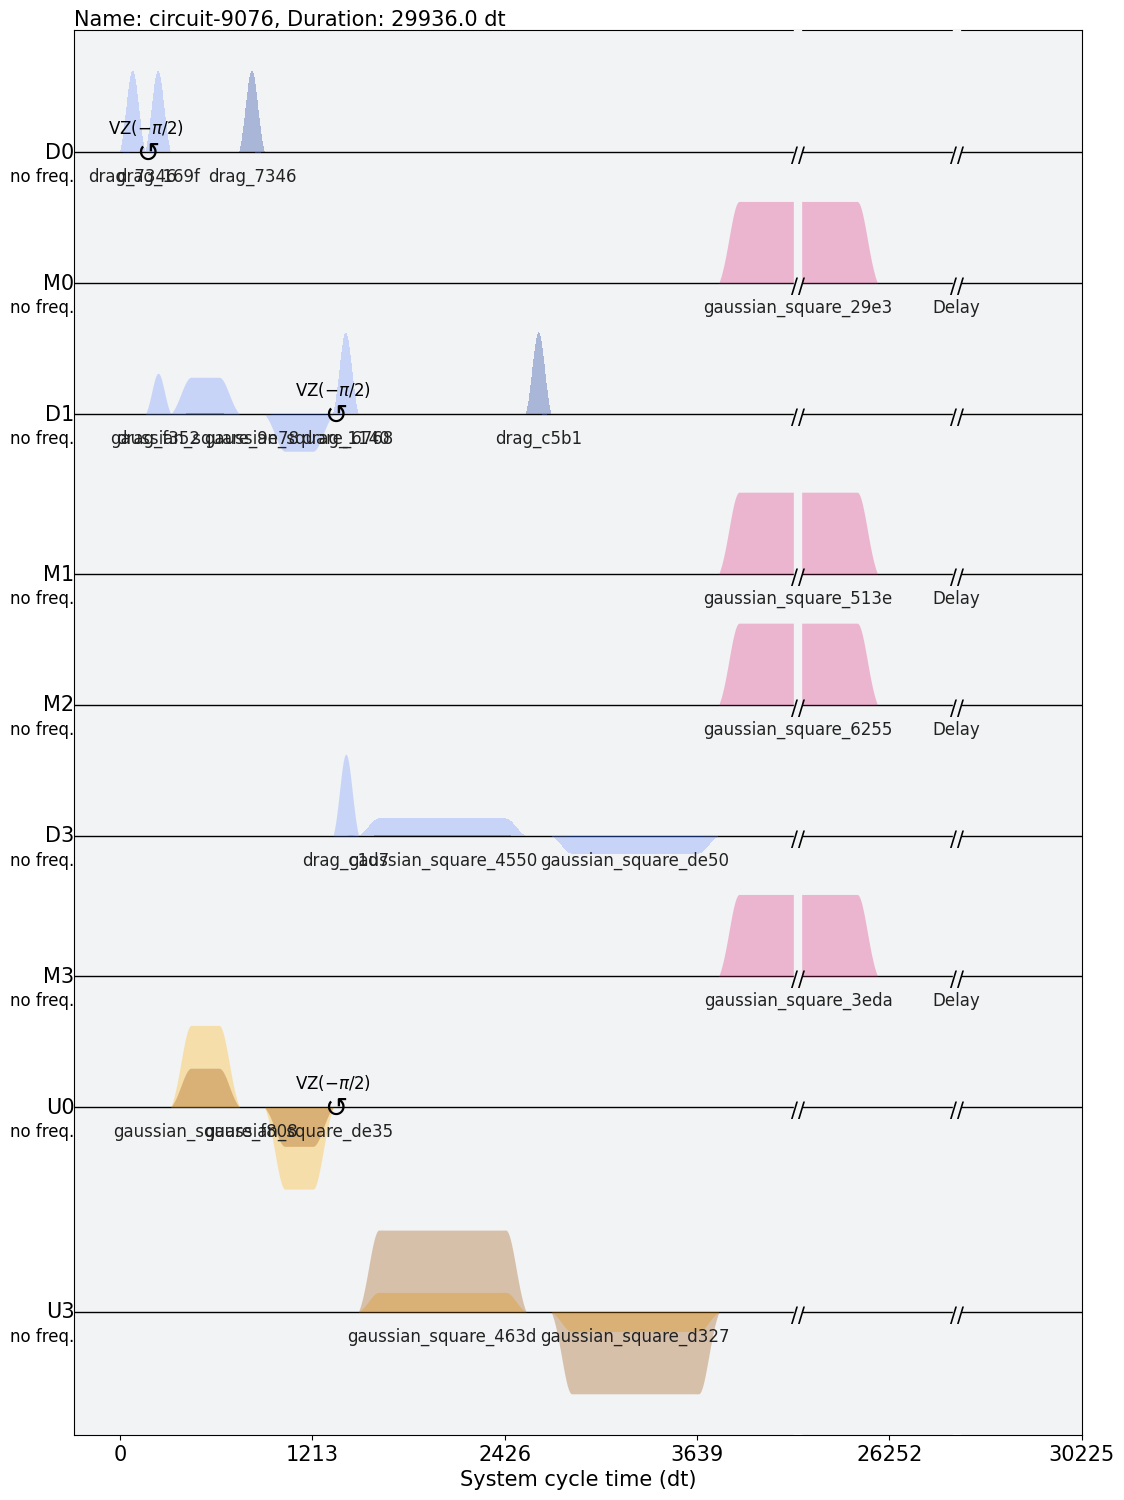

In [20]:
circ = QuantumCircuit(4)
circ.x(0)
circ.cx(0,1)
circ.cx(1,3)

circ.measure_all()

backend = FakeValencia()
circ_trans = transpile(circ, backend)
circ_sched = schedule(circ, backend)
circ_sched.draw()

DataBin<>(meas=BitArray(<shape=(), num_shots=2048, num_bits=4>))
The counts are: {'1011': 2048}


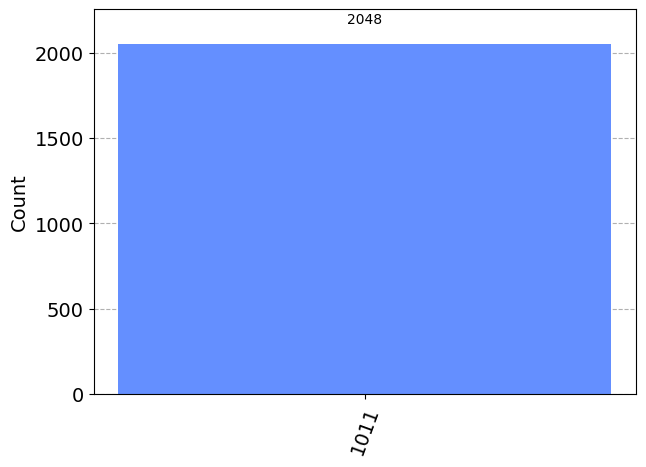

In [22]:
sampler_v2 = StatevectorSampler()
# Run using V2 sampler
result = sampler_v2.run([circ], shots=2048).result()
# Access result data for pub 0
data_pub = result[0].data
print(data_pub)
# Access bitstring for the classical register "meas"
#bitstring = data_pub.c.get_bitstring()
#print(f"The bitstring shape is: {bitstring.shape}")
# Get counts for the classical register "meas"
noiseless_counts = data_pub.meas.get_counts()
print(f"The counts are: {noiseless_counts}")

plot_histogram(noiseless_counts)

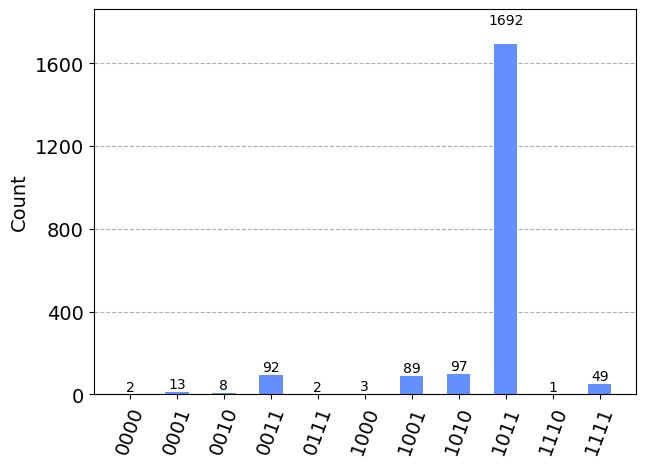

In [23]:
transpiled_circ = transpile(circ, backend)
# Run the transpiled circuit using the simulated fake backend
job_fake = backend.run(transpiled_circ, shots=2048)
noisy_counts = job_fake.result().get_counts()
plot_histogram(noisy_counts)

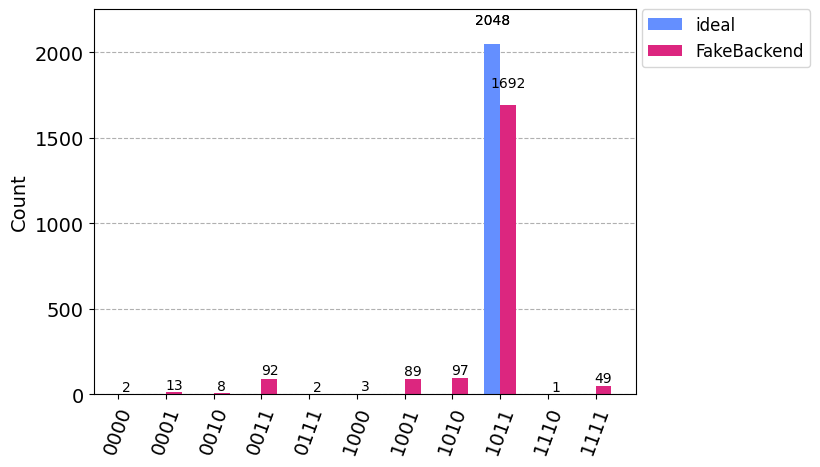

In [24]:
plot_histogram([noiseless_counts, noisy_counts], legend=['ideal','FakeBackend'])

In [25]:
#Check gate duration
from qiskit.transpiler import PassManager, InstructionDurations
from qiskit.transpiler.passes import ALAPSchedule, DynamicalDecoupling
from qiskit.visualization import timeline_drawer

durations = InstructionDurations(
    [("cx", [0, 1], backend.properties().gate_length('cx', [0,1])/backend.configuration().dt), ("reset", None, 10),
     ("cx", [1, 3], backend.properties().gate_length('cx', [1,2])/backend.configuration().dt),
     ("x", None, backend.properties().gate_length('x', 0)/backend.configuration().dt), ("measure", None, 22400)]
)

print(durations)

reset: 10 dt
x: 160.0 dt
measure: 22400 dt
cx(0, 1): 1183.9999999999998 dt
cx(1, 3): 2176.0 dt



In [26]:
durations = InstructionDurations(
    [("cx", [0, 1], 1184), ("reset", None, 10),
     ("cx", [1, 3], 2176),
     ("x", None, 160), ("y", None, 160),("measure", None, 22400)]
)

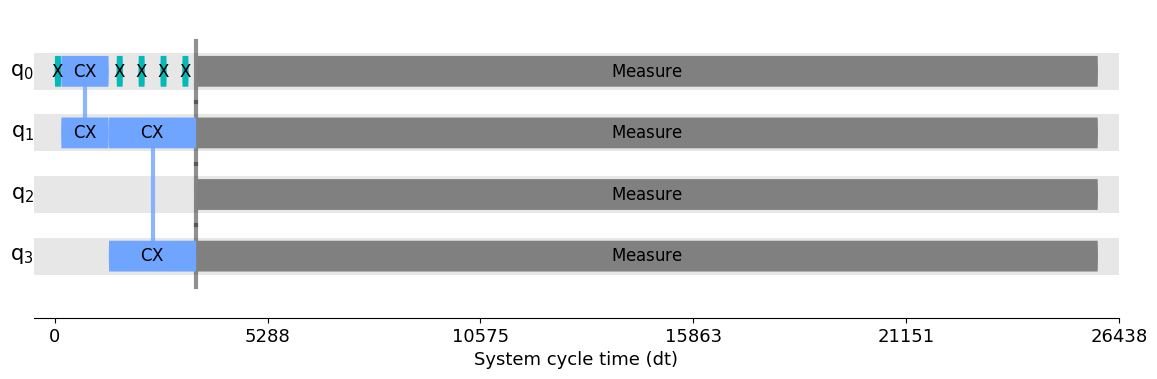

In [27]:
from qiskit.circuit.library import XGate, YGate
circ = QuantumCircuit(4)
circ.x(0)
circ.cx(0, 1)
circ.cx(1, 3)


circ.measure_all()

dd_sequence = [XGate(), XGate(), XGate(), XGate()]
pm = PassManager([ALAPSchedule(durations), DynamicalDecoupling(durations, dd_sequence)])
circ_dd = pm.run(circ)
timeline_drawer(circ_dd)

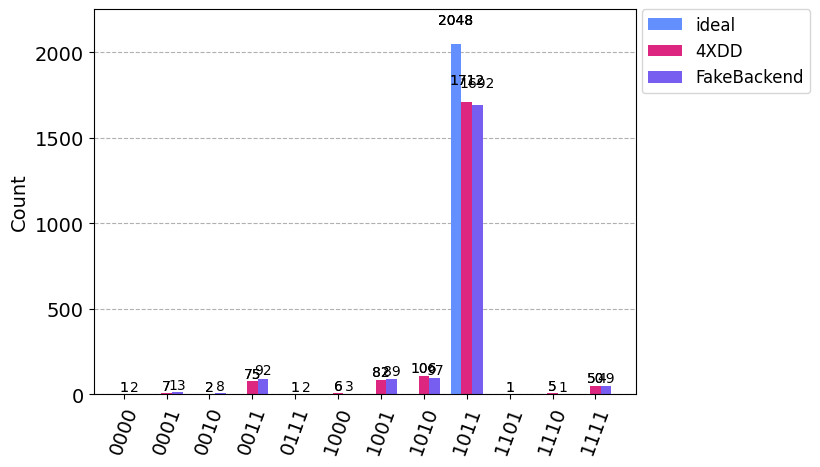

In [28]:
transpiled_circ = transpile(circ_dd, backend)
# Run the transpiled circuit using the simulated fake backend
job_fake = backend.run(transpiled_circ, shots=2048)
four_x_counts = job_fake.result().get_counts()
plot_histogram([noiseless_counts, four_x_counts, noisy_counts], legend=['ideal','4XDD','FakeBackend'])

## Calibration of Pauli X Gate using Qiskit Dynamics Backend

Pulse Simulation is not supported on fake backends directly - https://github.com/Qiskit/qiskit/pull/8979, however, Qiskit Dynamics is a tool that can be used for Pulse simulations and it supports Fake Backends

In [4]:
# Configure to use JAX internally
import jax
jax.config.update("jax_enable_x64", True)
jax.config.update("jax_platform_name", "cpu")
from qiskit_dynamics.array import Array
Array.set_default_backend("jax")

In [5]:
# Define the 2-qubit qubit fixed-frequency transmon model with fixed coupling Hamiltonian parameters

dim = 3

v0 = 4.86e9
anharm0 = -0.32e9
r0 = 0.22e9

v1 = 4.97e9
anharm1 = -0.32e9
r1 = 0.26e9

J = 0.002e9

a = np.diag(np.sqrt(np.arange(1, dim)), 1)
adag = np.diag(np.sqrt(np.arange(1, dim)), -1)
N = np.diag(np.arange(dim))

ident = np.eye(dim, dtype=complex)
full_ident = np.eye(dim**2, dtype=complex)

N0 = np.kron(ident, N)
N1 = np.kron(N, ident)

a0 = np.kron(ident, a)
a1 = np.kron(a, ident)

a0dag = np.kron(ident, adag)
a1dag = np.kron(adag, ident)


static_ham0 = 2 * np.pi * v0 * N0 + np.pi * anharm0 * N0 * (N0 - full_ident)
static_ham1 = 2 * np.pi * v1 * N1 + np.pi * anharm1 * N1 * (N1 - full_ident)

static_ham_full = static_ham0 + static_ham1 + 2 * np.pi * J * ((a0 + a0dag) @ (a1 + a1dag))

drive_op0 = 2 * np.pi * r0 * (a0 + a0dag)
drive_op1 = 2 * np.pi * r1 * (a1 + a1dag)

In [7]:
# build solver
dt = 1/4.5e9

solver = Solver(
    static_hamiltonian=static_ham_full,
    hamiltonian_operators=[drive_op0, drive_op1, drive_op0, drive_op1],
    rotating_frame=static_ham_full,
    hamiltonian_channels=["d0", "d1", "u0", "u1"],
    channel_carrier_freqs={"d0": v0, "d1": v1, "u0": v1, "u1": v0},
    dt=dt,
)

In [8]:
# Consistent solver option to use throughout Chapter 16
solver_options = {"method": "jax_odeint", "atol": 1e-6, "rtol": 1e-8, "hmax": dt}

dynamic_backend = DynamicsBackend(
    solver=solver,
    subsystem_dims=[dim, dim], # for computing measurement data
    solver_options=solver_options, # to be used every time run is called
)

In [11]:
# Run our Pauli X Gate on an Ideal Simulator namely version 2 Sampler
circ = QuantumCircuit(1, 1)
circ.x(0)
circ.measure([0], [0])

sampler_v2 = StatevectorSampler()
result = sampler_v2.run([circ], shots=1024).result()
data_pub = result[0].data
# Get counts for the classical register "c"
ideal_counts = data_pub.c.get_counts()
print(f"The counts are: {ideal_counts}")

DataBin<>(c=BitArray(<shape=(), num_shots=1024, num_bits=1>))
The counts are: {'1': 1024}


CPU times: total: 625 ms
Wall time: 861 ms


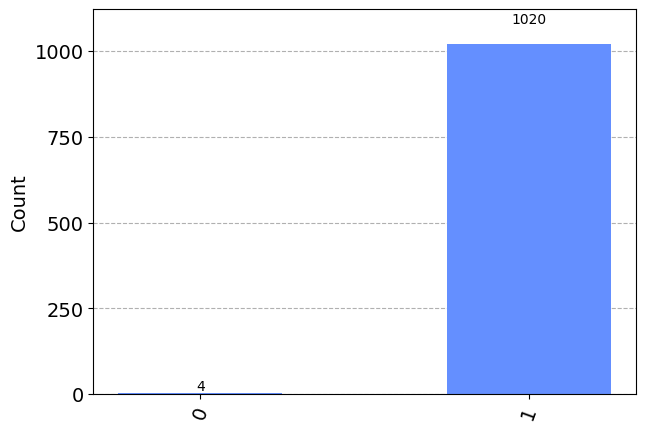

In [12]:
# Run the circuit for Calibrated X gate using Gaussian Pulse on Qiskit Dynamics Backend (Without FakeBackend)
circ = QuantumCircuit(1, 1)
circ.x(0)
circ.measure([0], [0])

#Tuning the duration, amp and sigma can give calibration results near to X gate
with pulse.build() as x_q0:
    pulse.play(
        pulse.library.Gaussian(duration=256, amp=0.1, sigma=40, name="custom"), 
        pulse.DriveChannel(0)
    )

circ.add_calibration("x", qubits=[0], schedule=x_q0)

%time res = dynamic_backend.run(circ).result()

calibrated_x_counts = res.get_counts(0)

plot_histogram(calibrated_x_counts)

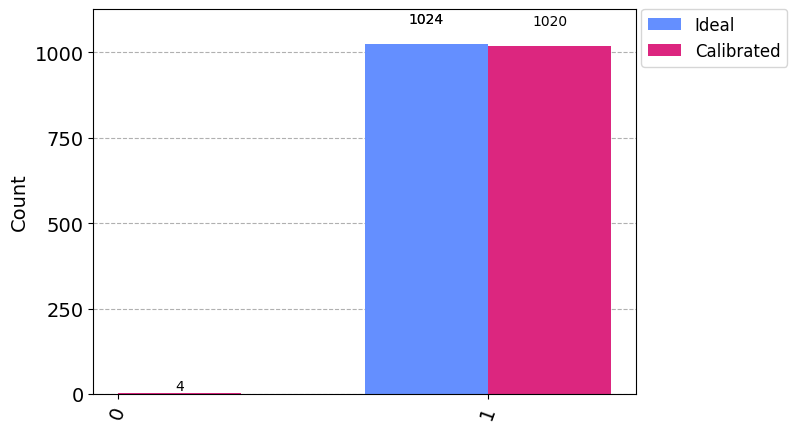

In [49]:
plot_histogram([ideal_counts,calibrated_x_counts], legend=['Ideal','Calibrated'])

In [12]:
# Define the Fake Backend with the help of Qiskit Dynamics Backend
true_backend = DynamicsBackend(solver=solver).from_backend(FakeValencia())

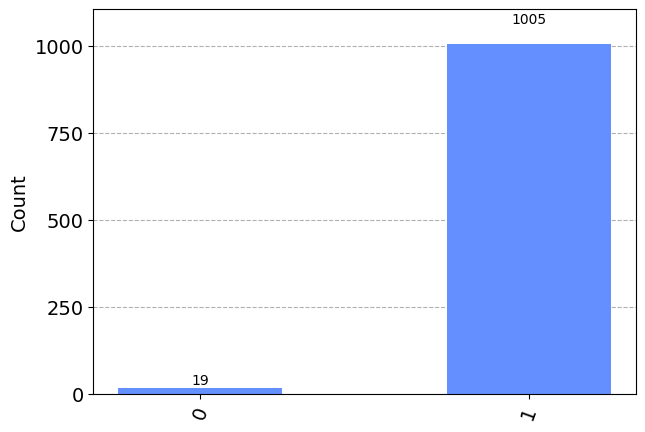

In [13]:
# Run a Custom X Gate circuit on the Fake Backend via Qiskit Dynamics (Non Calibrated)
amplit = 0.18
amp = Parameter('amp')

circ = QuantumCircuit(1)
custom_x_gate = Gate('custom_x_gate', 1, [])

circ.append(custom_gate, [0])
circ.measure_all()

with pulse.build(true_backend, name='custom_x') as my_sched:
    pulse.play(Drag(duration=160, amp=amp, sigma=40, beta=-0.25388969010654494), pulse.drive_channel(0))
    
my_sched.assign_parameters({amp:amplit})

circ.add_calibration(custom_x_gate, qubits=[0], schedule=my_sched)

result = true_backend.run(circ).result()

x_counts = result.get_counts(0)

plot_histogram(x_counts)

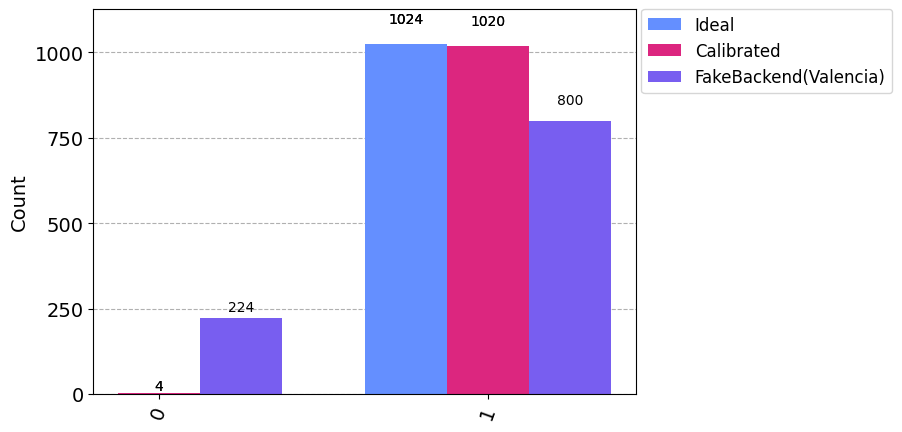

In [13]:
plot_histogram([ideal_counts,calibrated_x_counts, x_counts], legend=['Ideal','Calibrated (Without FakeBackend)', 'FakeBackend(Valencia)'])

In [9]:
def calibration_x_gate(parameter):
    amp = Parameter('amp')
    circ = QuantumCircuit(1)
    custom_gate = Gate('my_custom_gate', 1, [])
    circ.append(custom_gate, [0])
    circ.measure_all()

    true_backend = DynamicsBackend(solver=solver).from_backend(FakeValencia())
    with pulse.build(true_backend, name='custom') as my_schedule:
        pulse.play(Drag(duration=160, amp=amp, sigma=40, beta=-0.25388969010654494), pulse.drive_channel(0))
    
    my_schedule.assign_parameters({amp:parameter})
    circ.add_calibration(custom_gate, [0], my_schedule)

    circ_transpile = transpile(circ, true_backend)
    schedule_circ = schedule(circ_transpile, true_backend)
    
    job = true_backend.run(schedule_circ, shots=10000)
    counts = job.result().get_counts()
    
    if '0' in counts:
        return (counts['0'])/1024
    else:
        return 0

In [10]:
res = minimize_scalar(calibration_x_gate, bounds=(0.1, 0.2), method='bounded')
print(res.x)

0.16612017479575614


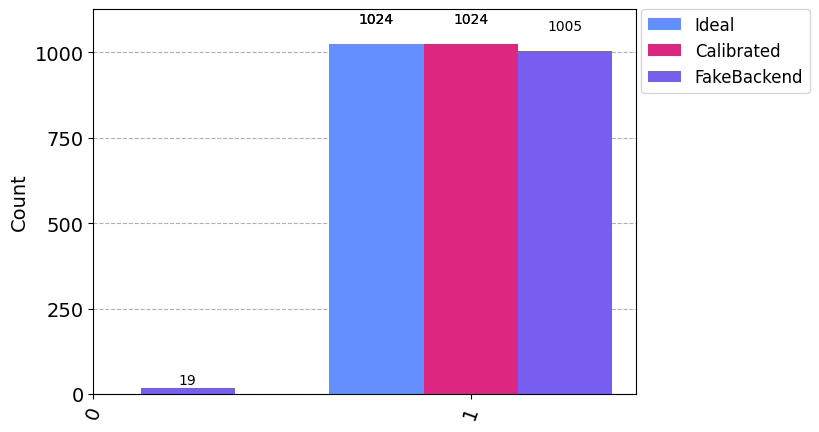

In [14]:
amp = Parameter('amp')
circ = QuantumCircuit(1)
custom_gate = Gate('my_custom_x_gate', 1, [])
circ.append(custom_gate, [0])
circ.measure_all()

true_backend = DynamicsBackend(solver=solver).from_backend(FakeValencia())
with pulse.build(true_backend, name='custom_x_gate') as best_x_sched:
    pulse.play(Drag(duration=160, amp=amp, sigma=40, beta=-0.25388969010654494), pulse.drive_channel(0))
    
best_x_sched.assign_parameters({amp:res.x})
circ.add_calibration(custom_gate, [0], best_x_sched)
    
circ_transpile = transpile(circ, true_backend)
schedule_circ = schedule(circ_transpile, true_backend)
    
job = true_backend.run(schedule_circ)
calibrated_counts = job.result().get_counts()

plot_histogram([ideal_counts, calibrated_counts, x_counts], legend=['Ideal','Calibrated', 'FakeBackend'])